A collection of data points encompassing various medical and environmental factors related to asthma, used for research purposes to understand the disease, identify potential triggers, and develop predictive models for asthma attacks, typically including details like patient demographics, clinical symptoms, medication usage, environmental exposures, and lung function test results, allowing researchers to analyze patterns and correlations within the data to gain insights into asthma management and treatment strategies. 

STEP 1: Import Required Libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE # type: ignore
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import  accuracy_score, confusion_matrix



STEP 2: Reading Dataset

In [72]:
df = pd.read_csv("D:/DataScience/Project/asthma_disease_data.csv")
print (df)

      PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0          5034   63       0          1               0  15.848744        0   
1          5035   26       1          2               2  22.757042        0   
2          5036   57       0          2               1  18.395396        0   
3          5037   40       1          2               1  38.515278        0   
4          5038   61       0          0               3  19.283802        0   
...         ...  ...     ...        ...             ...        ...      ...   
2387       7421   43       1          0               2  29.059613        0   
2388       7422   18       1          0               1  20.740850        0   
2389       7423   54       0          3               2  37.079560        0   
2390       7424   46       1          0               2  23.444712        0   
2391       7425   26       1          0               0  28.123021        1   

      PhysicalActivity  DietQuality  SleepQuality  

STEP 3 : Data Structure

In [73]:
# shape: shape will show how many features (columns) and observations (rows) there are in the dataset
df.shape

(2392, 29)

In [74]:
#A quick and informative overview of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

In [75]:
# Convert float columns to int
float_cols = df.select_dtypes(include=['float64']).columns
df[float_cols] = df[float_cols].astype(int)

# Verify the conversion
df.dtypes


PatientID                  int64
Age                        int64
Gender                     int64
Ethnicity                  int64
EducationLevel             int64
BMI                        int32
Smoking                    int64
PhysicalActivity           int32
DietQuality                int32
SleepQuality               int32
PollutionExposure          int32
PollenExposure             int32
DustExposure               int32
PetAllergy                 int64
FamilyHistoryAsthma        int64
HistoryOfAllergies         int64
Eczema                     int64
HayFever                   int64
GastroesophagealReflux     int64
LungFunctionFEV1           int32
LungFunctionFVC            int32
Wheezing                   int64
ShortnessOfBreath          int64
ChestTightness             int64
Coughing                   int64
NighttimeSymptoms          int64
ExerciseInduced            int64
Diagnosis                  int64
DoctorInCharge            object
dtype: object

In [76]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'PollutionExposure', 'PollenExposure', 'DustExposure', 'PetAllergy',
       'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema', 'HayFever',
       'GastroesophagealReflux', 'LungFunctionFEV1', 'LungFunctionFVC',
       'Wheezing', 'ShortnessOfBreath', 'ChestTightness', 'Coughing',
       'NighttimeSymptoms', 'ExerciseInduced', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [77]:
# Generate descriptive statistics of DataFrame columns
df.describe(include='all')

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,...,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dr_Confid
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2392
mean,6229.500000,42.137960,0.493311,0.669732,1.307274,26.747074,0.141722,4.558946,4.530518,6.506689,...,2.051839,3.213211,0.596154,0.500418,0.503344,0.503344,0.602425,0.604933,0.051839,NaN
std,690.655244,21.606655,0.500060,0.986120,0.898242,7.195716,0.348838,2.885932,2.887242,1.719071,...,0.810216,1.318603,0.490770,0.500104,0.500093,0.500093,0.489499,0.488967,0.221749,NaN
min,5034.000000,5.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,4.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,5631.750000,23.000000,0.000000,0.000000,1.000000,20.000000,0.000000,2.000000,2.000000,5.000000,...,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,6229.500000,42.000000,0.000000,0.000000,1.000000,27.000000,0.000000,5.000000,5.000000,6.000000,...,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN
75%,6827.250000,61.000000,1.000000,1.000000,2.000000,33.000000,0.000000,7.000000,7.000000,8.000000,...,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN


In [78]:
#  Show the Data type of each column
df.dtypes

PatientID                  int64
Age                        int64
Gender                     int64
Ethnicity                  int64
EducationLevel             int64
BMI                        int32
Smoking                    int64
PhysicalActivity           int32
DietQuality                int32
SleepQuality               int32
PollutionExposure          int32
PollenExposure             int32
DustExposure               int32
PetAllergy                 int64
FamilyHistoryAsthma        int64
HistoryOfAllergies         int64
Eczema                     int64
HayFever                   int64
GastroesophagealReflux     int64
LungFunctionFEV1           int32
LungFunctionFVC            int32
Wheezing                   int64
ShortnessOfBreath          int64
ChestTightness             int64
Coughing                   int64
NighttimeSymptoms          int64
ExerciseInduced            int64
Diagnosis                  int64
DoctorInCharge            object
dtype: object

STEP 4: Data Cleaning and Preprocessing

In [79]:
df.isnull().sum()

PatientID                 0
Age                       0
Gender                    0
Ethnicity                 0
EducationLevel            0
BMI                       0
Smoking                   0
PhysicalActivity          0
DietQuality               0
SleepQuality              0
PollutionExposure         0
PollenExposure            0
DustExposure              0
PetAllergy                0
FamilyHistoryAsthma       0
HistoryOfAllergies        0
Eczema                    0
HayFever                  0
GastroesophagealReflux    0
LungFunctionFEV1          0
LungFunctionFVC           0
Wheezing                  0
ShortnessOfBreath         0
ChestTightness            0
Coughing                  0
NighttimeSymptoms         0
ExerciseInduced           0
Diagnosis                 0
DoctorInCharge            0
dtype: int64

In [80]:
df = df.drop(columns=['PatientID', 'DoctorInCharge'])

In [81]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'PhysicalActivity', 'DietQuality', 'SleepQuality', 'PollutionExposure',
       'PollenExposure', 'DustExposure', 'PetAllergy', 'FamilyHistoryAsthma',
       'HistoryOfAllergies', 'Eczema', 'HayFever', 'GastroesophagealReflux',
       'LungFunctionFEV1', 'LungFunctionFVC', 'Wheezing', 'ShortnessOfBreath',
       'ChestTightness', 'Coughing', 'NighttimeSymptoms', 'ExerciseInduced',
       'Diagnosis'],
      dtype='object')

In [82]:
# Diaplay the first 5 rows of the dataframe
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
0,63,0,1,0,15,0,0,5,8,7,...,0,1,4,0,0,1,0,0,1,0
1,26,1,2,2,22,0,5,6,5,1,...,0,2,1,1,0,0,1,1,1,0
2,57,0,2,1,18,0,6,9,6,1,...,0,1,5,1,1,1,0,1,1,0
3,40,1,2,1,38,0,1,5,4,0,...,0,3,2,1,0,1,1,1,0,0
4,61,0,0,3,19,0,4,3,9,0,...,0,3,3,1,1,1,0,0,1,0


STEP  6: Visualizing Distributions

Q1: What is the age distribution of patients?

C:\Users\sitha\AppData\Local\Temp\ipykernel_16380\3408356423.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.index, y=age_counts.values, palette="Set2")


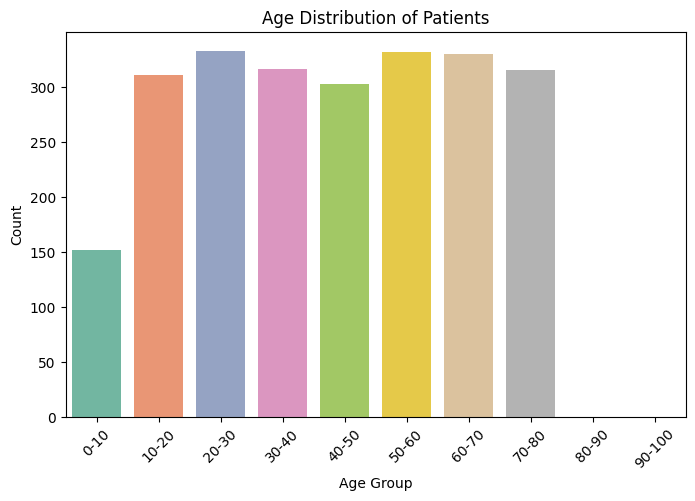

In [83]:


# Create age groups (bins)
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90", "90-100"]
df["Age Group"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right=False)

# Count patients in each age group
age_counts = df["Age Group"].value_counts().sort_index()

# Plot bar graph
plt.figure(figsize=(8, 5))
sns.barplot(x=age_counts.index, y=age_counts.values, palette="Set2")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Age Distribution of Patients")
plt.xticks(rotation=45)
plt.show()



Gives a clearer view of how many patients fall into different age ranges.

How does asthma prevalence vary by gender? 

<Figure size 1000x500 with 0 Axes>

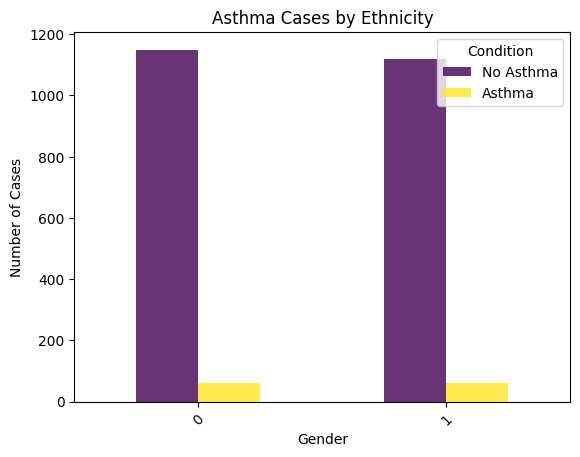

In [84]:

asthma_counts = df.groupby("Gender")["Diagnosis"].value_counts().unstack()

# Plot bar graph
plt.figure(figsize=(10, 5))
asthma_counts.plot(kind="bar", colormap="viridis", alpha=0.8)
plt.xlabel("Gender")
plt.ylabel("Number of Cases")
plt.title("Asthma Cases by Ethnicity")
plt.legend(["No Asthma", "Asthma"], title="Condition")
plt.xticks(rotation=45)
plt.show()


This will show a stacked bar chart where each gender is split into Asthma vs. No Asthma.
If one gender has a significantly higher asthma percentage, it suggests a possible biological or environmental factor.
Further investigation could explore hormonal, genetic, or lifestyle differences affecting asthma rates.

Q3: Is there any relationship between ethnicity and asthma cases?

<Figure size 1000x500 with 0 Axes>

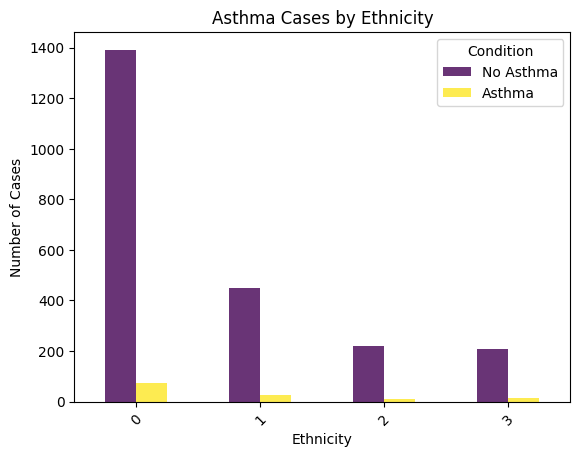

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count asthma cases by ethnicity
asthma_counts = df.groupby("Ethnicity")["Diagnosis"].value_counts().unstack()

# Plot bar graph
plt.figure(figsize=(10, 5))
asthma_counts.plot(kind="bar", colormap="viridis", alpha=0.8)
plt.xlabel("Ethnicity")
plt.ylabel("Number of Cases")
plt.title("Asthma Cases by Ethnicity")
plt.legend(["No Asthma", "Asthma"], title="Condition")
plt.xticks(rotation=45)
plt.show()


If certain ethnic groups have higher asthma prevalence, it could be linked to genetic, socioeconomic, or environmental factors.

Q4: What is the relationship between BMI (Body Mass Index) and asthma?

C:\Users\sitha\AppData\Local\Temp\ipykernel_16380\266688668.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_asthma_counts = df.groupby("BMI Category")["Diagnosis"].value_counts(normalize=True).unstack() * 100


<Figure size 800x500 with 0 Axes>

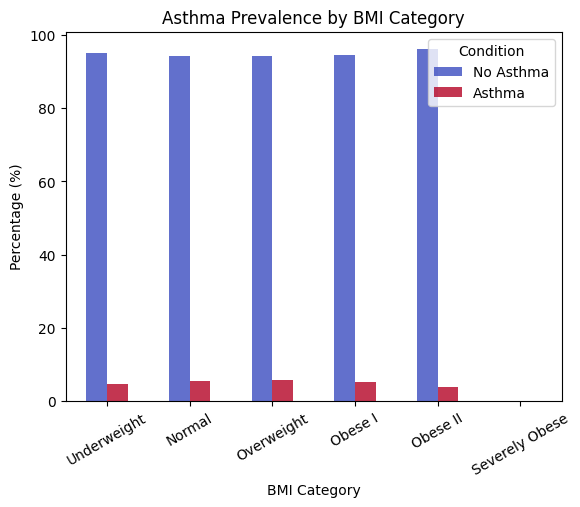

In [86]:

# Define BMI categories
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, 100]  # BMI ranges
bmi_labels = ["Underweight", "Normal", "Overweight", "Obese I", "Obese II", "Severely Obese"]
df["BMI Category"] = pd.cut(df["BMI"], bins=bmi_bins, labels=bmi_labels, right=False)

# Count asthma cases per BMI category
bmi_asthma_counts = df.groupby("BMI Category")["Diagnosis"].value_counts(normalize=True).unstack() * 100

# Plot bar graph
plt.figure(figsize=(8, 5))
bmi_asthma_counts.plot(kind="bar", colormap="coolwarm", alpha=0.8)
plt.xlabel("BMI Category")
plt.ylabel("Percentage (%)")
plt.title("Asthma Prevalence by BMI Category")
plt.legend(["No Asthma", "Asthma"], title="Condition")
plt.xticks(rotation=30)
plt.show()


If asthma patients have a higher median BMI, there could be a link between obesity and asthma risk.
A wider BMI range among asthma patients may indicate different asthma phenotypes.

Q5: What are the common Causes for Asthma?

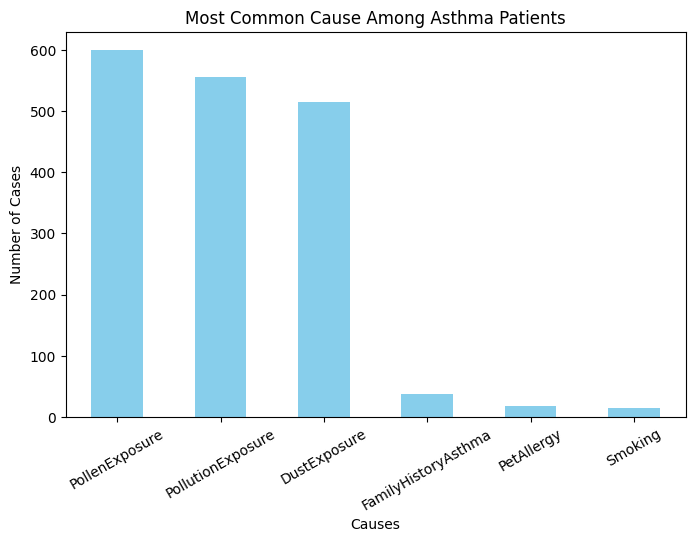

In [87]:

asthma_patients = df[df["Diagnosis"] == 1]


Causes = ["Smoking", "PollutionExposure", "PollenExposure", "DustExposure","PetAllergy",
"FamilyHistoryAsthma"]
symptom_counts = asthma_patients[Causes].sum()

# Plot bar graph
plt.figure(figsize=(8, 5))
symptom_counts.sort_values(ascending=False).plot(kind="bar", color="skyblue")
plt.xlabel("Causes")
plt.ylabel("Number of Cases")
plt.title("Most Common Cause Among Asthma Patients")
plt.xticks(rotation=30)
plt.show()


Based on the analysis, the most common causes of asthma among patients are environmental factors such as pollen exposure, pollution, and dust exposure. These three factors contribute to the majority of asthma cases, indicating that air quality and allergens play a significant role in triggering asthma.

While family history of asthma is a contributing factor, it appears less frequently than environmental causes. Pet allergies and smoking have minimal impact in this dataset, suggesting that they are not the primary triggers for most patients but may still influence asthma in some cases.

Q6. What are the most common symptoms among asthma patients?

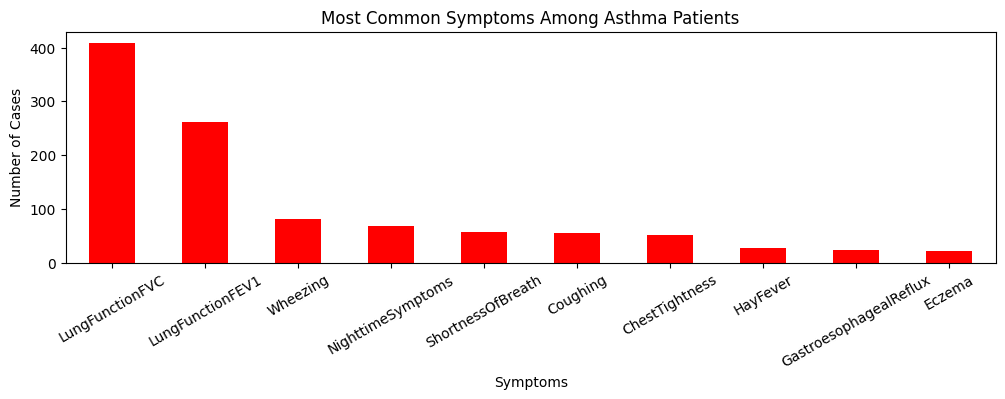

In [88]:
asthma_patients = df[df["Diagnosis"] == 1]

# Count symptom occurrences (adjust column names as per your dataset)
symptom_cols = ["Eczema", "HayFever", "GastroesophagealReflux", "LungFunctionFEV1","LungFunctionFVC","Wheezing","ShortnessOfBreath","ChestTightness","Coughing","NighttimeSymptoms"]
symptom_counts = asthma_patients[symptom_cols].sum()

# Plot bar graph
plt.figure(figsize=(12, 3))
symptom_counts.sort_values(ascending=False).plot(kind="bar", color="Red")
plt.xlabel("Symptoms")
plt.ylabel("Number of Cases")
plt.title("Most Common Symptoms Among Asthma Patients")
plt.xticks(rotation=30)
plt.show()

The most frequent symptoms among asthma patients are lung function impairments, specifically Lung Function FVC (Forced Vital Capacity) and Lung Function FEV1 (Forced Expiratory Volume in 1 second). These symptoms indicate that reduced lung function is a primary characteristic of asthma.
Wheezing, shortness of breath, and nighttime symptoms, which are typical of asthma attacks.
Coughing and chest tightness, which often accompany respiratory distress.
Less frequent symptoms such as hay fever, gastroesophageal reflux, and eczema may be linked to allergic or inflammatory responses associated with asthma.

Train Models 

In [89]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=["Diagnosis"])  # Drop non-relevant columns
y = df["Diagnosis"]  # Target variable

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1913, 28), (479, 28), (1913,), (479,))

In [90]:
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
print(X)

      Age  Gender  Ethnicity  EducationLevel  BMI  Smoking  PhysicalActivity  \
0      63       0          1               0   15        0                 0   
1      26       1          2               2   22        0                 5   
2      57       0          2               1   18        0                 6   
3      40       1          2               1   38        0                 1   
4      61       0          0               3   19        0                 4   
...   ...     ...        ...             ...  ...      ...               ...   
2387   43       1          0               2   29        0                 3   
2388   18       1          0               1   20        0                 5   
2389   54       0          3               2   37        0                 4   
2390   46       1          0               2   23        0                 9   
2391   26       1          0               0   28        1                 1   

      DietQuality  SleepQuality  Pollut

In [92]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
2387    1
2388    1
2389    1
2390    0
2391    0
Name: Diagnosis, Length: 2392, dtype: int64


In [93]:
print(y_train.shape)
print(y_test.shape)

(1913,)
(479,)


In [94]:
y_train.value_counts()

Diagnosis
0    1812
1     101
Name: count, dtype: int64

In [95]:
y_test.value_counts()

Diagnosis
0    456
1     23
Name: count, dtype: int64

In [96]:
smote=SMOTE(random_state=42)

In [97]:
print(X_train.select_dtypes(include=['object']).columns)


Index([], dtype='object')


In [98]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])  # If test data exists


In [99]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


In [100]:
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [101]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [102]:
print(y_train_smote.shape)

(3624,)


In [103]:
print(y_train_smote.value_counts())

Diagnosis
0    1812
1    1812
Name: count, dtype: int64


MODEL 1: Random Forest model

In [112]:
from sklearn.metrics import accuracy_score

# Re-split the data after conversion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)


accuracy


0.9519832985386222

In [106]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['category', 'object']).columns

# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Store the encoders for future reference

# Verify the conversion
df.dtypes


Age                          int64
Gender                       int64
Ethnicity                    int64
EducationLevel               int64
BMI                          int32
Smoking                      int64
PhysicalActivity             int32
DietQuality                  int32
SleepQuality                 int32
PollutionExposure            int32
PollenExposure               int32
DustExposure                 int32
PetAllergy                   int64
FamilyHistoryAsthma          int64
HistoryOfAllergies           int64
Eczema                       int64
HayFever                     int64
GastroesophagealReflux       int64
LungFunctionFEV1             int32
LungFunctionFVC              int32
Wheezing                     int64
ShortnessOfBreath            int64
ChestTightness               int64
Coughing                     int64
NighttimeSymptoms            int64
ExerciseInduced              int64
Diagnosis                    int64
Age Group                 category
BMI Category        

In [107]:
# Re-split the data after encoding
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
 

accuracy 


0.9519832985386222

MODEL 2: XGBoost model

In [108]:

# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
 

xgb_accuracy 


c:\Users\sitha\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [12:48:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


0.9498956158663883

In [109]:
from sklearn.preprocessing import LabelEncoder



# Encode categorical features if needed
for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Define features (X) and target (y)
X = df.drop(columns=["Diagnosis"])  # Features
y = df["Diagnosis"]  # Target

# Convert all float columns to int if necessary
X = X.apply(lambda col: col.astype(int) if col.dtype == 'float64' else col)

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of train/test sets
X_train.shape, X_test.shape


((1913, 28), (479, 28))

MODEL 3:  k-NN model

In [110]:
# Train k-NN model

knn_model = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors as default
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluate models
knn_accuracy = accuracy_score(y_test, y_pred_knn)

(knn_accuracy)



0.9478079331941545

MODEL 4:  MLP (Neural Network) model

In [ ]:
# Train MLP (Neural Network) model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)


# Evaluate models
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)

(mlp_accuracy)

(0.9331941544885177,
 '              precision    recall  f1-score   support\n\n           0       0.95      0.98      0.97       456\n           1       0.00      0.00      0.00        23\n\n    accuracy                           0.93       479\n   macro avg       0.48      0.49      0.48       479\nweighted avg       0.91      0.93      0.92       479\n')

Comparing Predictions and  Evaluate model performance

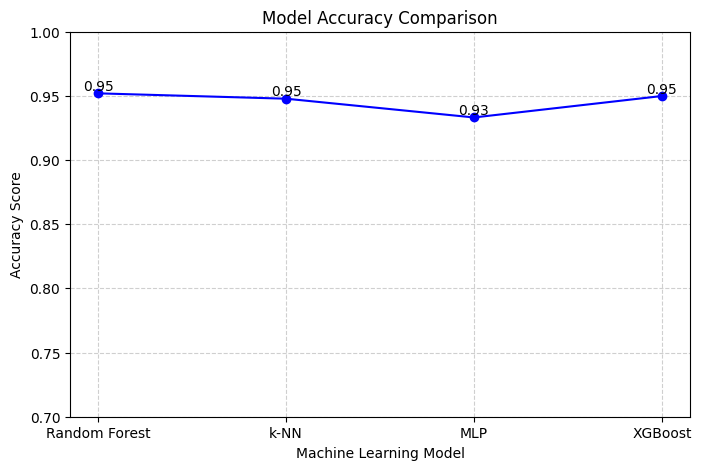

In [111]:

# Sample accuracy scores (assuming these from previous models)
models = ["Random Forest", "k-NN", "MLP", "XGBoost"]
accuracy_scores = [0.9519832985386222, 0.9478079331941545, 0.9331941544885177, 0.9498956158663883]  

# Plot line graph
plt.figure(figsize=(8, 5))
plt.plot(models, accuracy_scores, marker='o', linestyle='-', color='b', label="Accuracy")

# Annotate points with accuracy values
for i, score in enumerate(accuracy_scores):
    plt.text(i, score, f"{score:.2f}", ha='center', va='bottom', fontsize=10)

# Labels and title
plt.xlabel("Machine Learning Model")
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.ylim(0.7, 1.0)  # Keeping scale consistent
plt.grid(True, linestyle='--', alpha=0.6)




In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import joblib  # For saving the model



# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid
param_dist = {
    'n_estimators': np.arange(50, 500, 50),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Use RandomizedSearchCV
random_search = RandomizedSearchCV(rf, param_dist, n_iter=20, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit model
random_search.fit(X_train, y_train)




Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=42, verbose=2)

In [ ]:
# Get the best model
best_rf = random_search.best_estimator_

# Evaluate on test data
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Random Forest Accuracy: {accuracy:.4f}")



Optimized Random Forest Accuracy: 0.9520


In [ ]:
# Save the best model
joblib.dump(best_rf, "best_random_forest.pkl")
print("Best model saved as 'best_random_forest.pkl'")

Best model saved as 'best_random_forest.pkl'
